In [1]:
%matplotlib inline

In [2]:
### Using generalized float data in .nc files to check accuracy of my created plots
# import xarray as xr
# from xarray import Dataset
# f = xr.open_mfdataset('/Users/tyler/Desktop/SIO176/HW7/netc_float_data.nc')
# f.variables
# f.keys() # essentially a header file

# DIRECTIONS

### 1.Plot the trajectory of the Argo float on a map.
### 2.Describe the general circulation in the region, potentially including a figure from a paper. 
### 3.Make a plot of Time vs Potential Temperature at all depths. 
### 4.Make a plot of Time vs Salinity at all depths.
### 5.Plot the Argo data on a TS diagram and identify some of the water masses present.

# Loading libraries, required data

In [3]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import cartopy.crs as ccrs

# Extra cartopy libraries
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature

In [4]:
data = loadmat('/Users/tyler/Desktop/SIO176/HW7/float5903390.mat')

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'date', 'latitude', 'longitude', 'pressure', 'salinity', 'temperature'])

In [6]:
lon = data['longitude']
lat = data['latitude']

In [7]:
lonn = np.transpose(lon)
latt = np.transpose(lat)

# 1. Plotting Trajectory

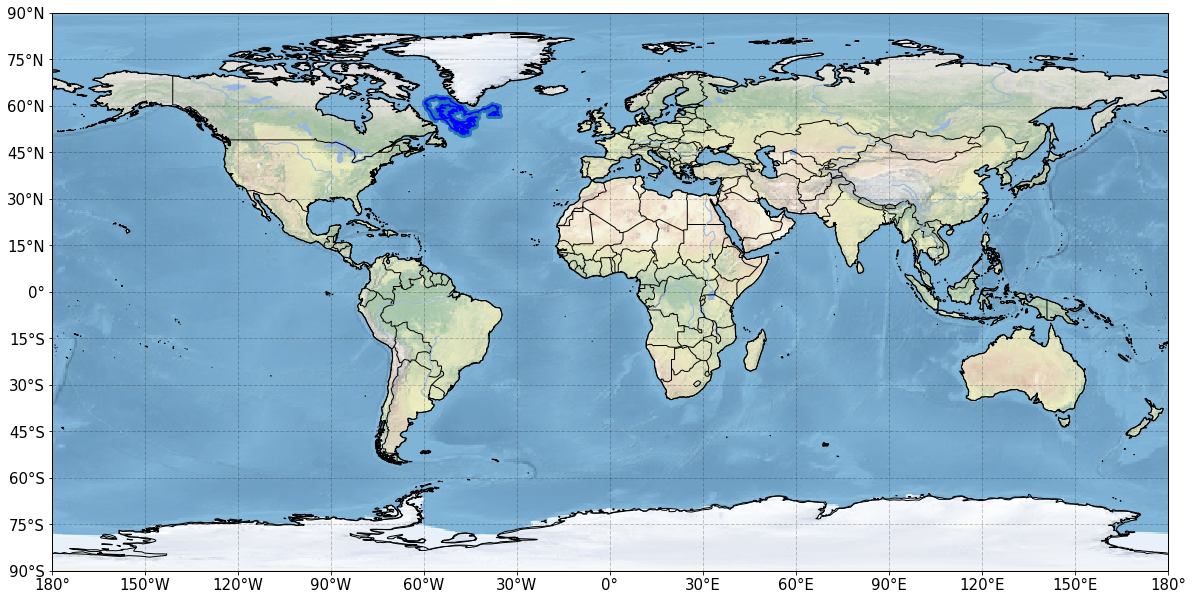

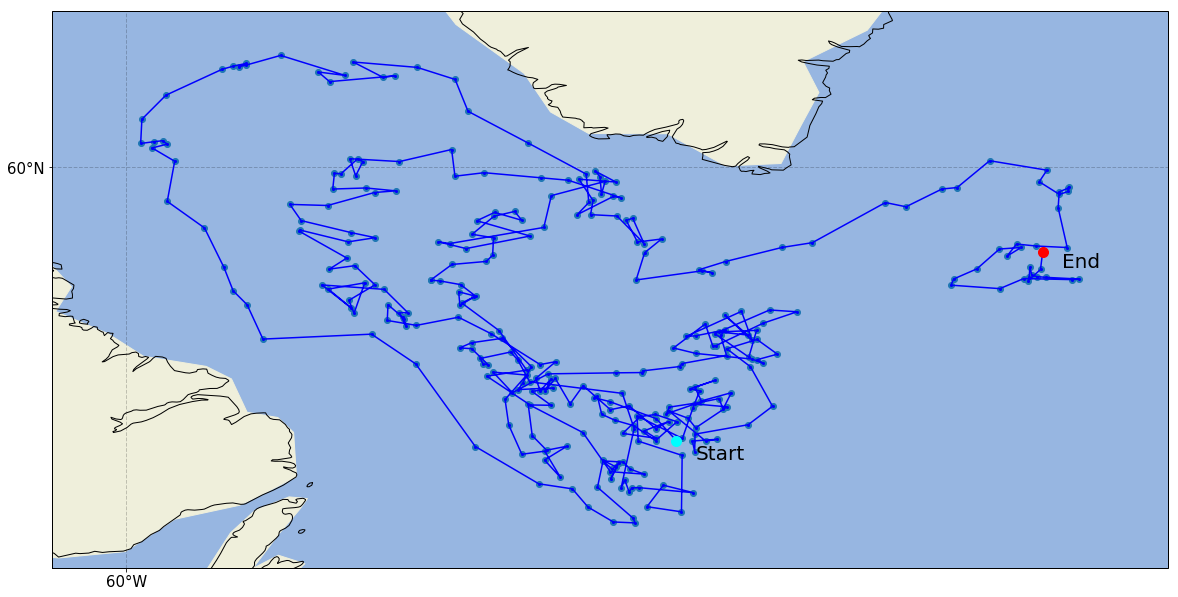

In [8]:
# define long/lat ticks
xticks = range(-180,181,30)
yticks = range(-90,91,15)

# plot fig object and projection
plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines(resolution='50m')
ax.stock_img()

# putting lat/long ticks
ax.set_xticks(xticks)
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

# change font size of ticks
ax.set_xticklabels(xticks,fontsize=15)
ax.set_yticklabels(xticks,fontsize=15)
ax.grid(linewidth=1, color='black', alpha=0.2, linestyle='--')# alpha=opacity

# put degrees on tick labels
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#nice features to add on map
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)

# plotting data
# plt.scatter(lon,lat,transform=ccrs.PlateCarree())
#plt.plot(lon,lat,marker='o',markersize=0.5, markerfacecolor='blue',transform=ccrs.PlateCarree())
#plt.plot(lon,lat,linestyle='dashed',linewidth=0.5,transform=ccrs.PlateCarree())
plt.scatter(lonn,latt)
plt.plot(lonn,latt,marker='o',c='blue',markersize=0.5)

#save figure to path
plt.savefig('/Users/tyler/Desktop/SIO176/HW7/trajectory_argo', dpi=300, bbox_inches='tight')


# zoomed in version
plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines(resolution='50m', color='black', linewidth=1)
#ax.stock_img()
# putting lat/long ticks
ax.set_xticks(xticks)
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
# change font size of ticks
ax.set_xticklabels(xticks,fontsize=15)
ax.set_yticklabels(xticks,fontsize=15)
ax.grid(linewidth=1, color='black', alpha=0.2, linestyle='--')# alpha=opacity

# put degrees on tick labels
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

#nice features to add on map
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

# plotting data
plt.scatter(lonn,latt,transform=ccrs.PlateCarree())
plt.plot(lonn,latt,marker='o',c='blue',markersize=2,transform=ccrs.PlateCarree())
plt.plot(lonn[0],latt[0],marker='o',c='cyan',markersize=10,transform=ccrs.PlateCarree())
plt.plot(lonn[-1],latt[-1],marker='o',c='red',markersize=10,transform=ccrs.PlateCarree())

# add start and end point labels
plt.text(lonn[0]+0.5,latt[0]-0.5,'Start',fontsize=20,transform=ccrs.PlateCarree());
plt.text(lonn[-1]+0.5,latt[-1]-0.4,'End',fontsize=20,transform=ccrs.PlateCarree());


#save figure to path
plt.savefig('/Users/tyler/Desktop/SIO176/HW7/trajectory_argo_zoomed', dpi=300, bbox_inches='tight')



# ax.set_xlim([-90,0])
# ax.set_ylim([30,90])
# Or
# ax.set_extent([-90,0,30,90], crs=ccrs.PlateCarree())) # good practice to include the crs= so code still works incase proj changes 

# 3. Make a plot of Time vs Potential Temperature at all depths. 

In [9]:
import gsw
from datetime import datetime,date
import pandas as pd

In [10]:
temp = data['temperature']# in-situ temp
pracsal = data['salinity'] # practical salinity
pres = data['pressure'] # pressure
date = np.transpose(data['date'])
date1 = data['date']
SA = gsw.SA_from_SP(pracsal, pres,lonn,latt)
pt = gsw.pt0_from_t(SA,temp,pres)

# Understanding temperature, salinity, pressure data

Temperature is in-situ temperature,
Salinity is practical salinity,
Pressure is just pressure,

In [11]:
print('temp: ', np.shape(temp), ';', 'pracsal: ', np.shape(pracsal), ';', 'pres: ', np.shape(pres))

temp:  (316, 400) ; pracsal:  (316, 400) ; pres:  (1, 400)


We see that temperature and practical salinity are both 316,400. That is they contain 316 profiles with 400 data points in each profile. We need to manipulate pressure data similar to this so we can plot a time vs PT at all pressures.

In [12]:
# create date matrix with str dates
datestrs = []
for i in range(0,len(date1[0][:])):
    a = datetime.fromordinal(int(date1[0][i])) # fromordinal takes the 6-digit float and converts from int to
    # date after epoch in a datetime object
    b = a.strftime('%m/%d/%Y') # convert datetime object to string
    datestrs = np.append(datestrs,b)
    
    
# create new fake pressure matrix
pres_new = []
# returns a new list of pressure every 8th pressure data point
for i in range(0, len(pres[0][:]),8):
    a = pres[0][i]
    pres_new = np.append(pres_new,a)
    

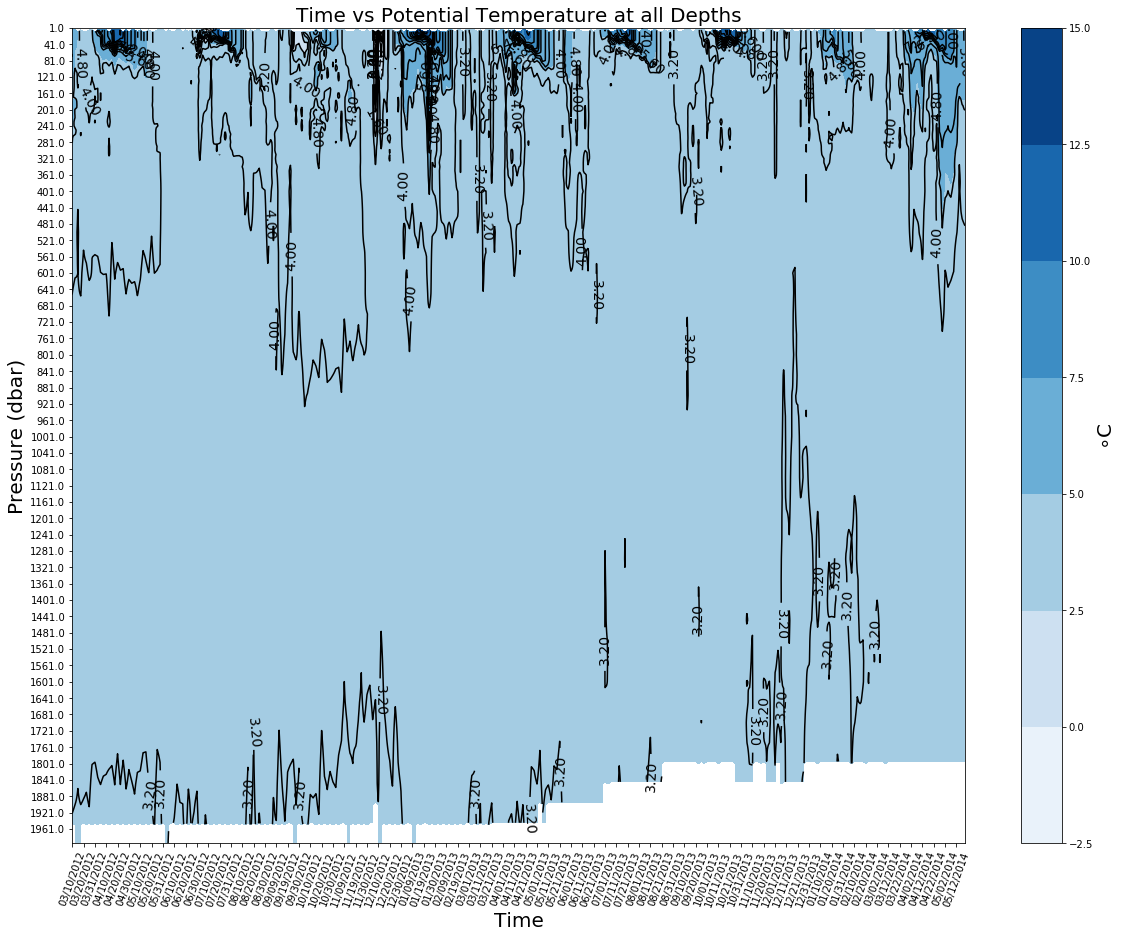

In [13]:
fig = plt.figure(figsize=(20,15))
ax = plt.axes()


im = plt.contourf((np.transpose(pt)),cmap='Blues')
con = plt.contour((np.transpose(pt)),colors='k',levels=20) 

plt.clabel(con, fmt='%4.2f',fontsize=14)
# its plotting i-th profile on y-axis i want it to be pres

cbar = plt.colorbar(im)
cbar.set_label('$\circ$C',fontsize=20)
# x labels/ticks
# datestrs has 316 profiles, divisible by 4 = 79 ticks
positions1 = range(0,316,4);
plt.xticks(positions1,datestrs);
lab = pres_new
degrees=70
plt.xticks(rotation=degrees);

# positions2 plots every 8th pressure y tick in the range of the data. pres_new holds every 8ths y tick
# x and y indices must match
positions2 = range(0,400,8)
plt.yticks(positions2,pres_new);
# y labels/ticks
# plt.yticks(pos, lab)
plt.gca().invert_yaxis()

plt.xlabel('Time',fontsize=20)
plt.ylabel('Pressure (dbar)',fontsize=20)
plt.title('Time vs Potential Temperature at all Depths', fontsize=20)
plt.savefig('/Users/tyler/Desktop/SIO176/HW7/TimevsPT', dpi=300, bbox_inches='tight')

# 4. Plot Time vs Absolute Salinity at all Depths

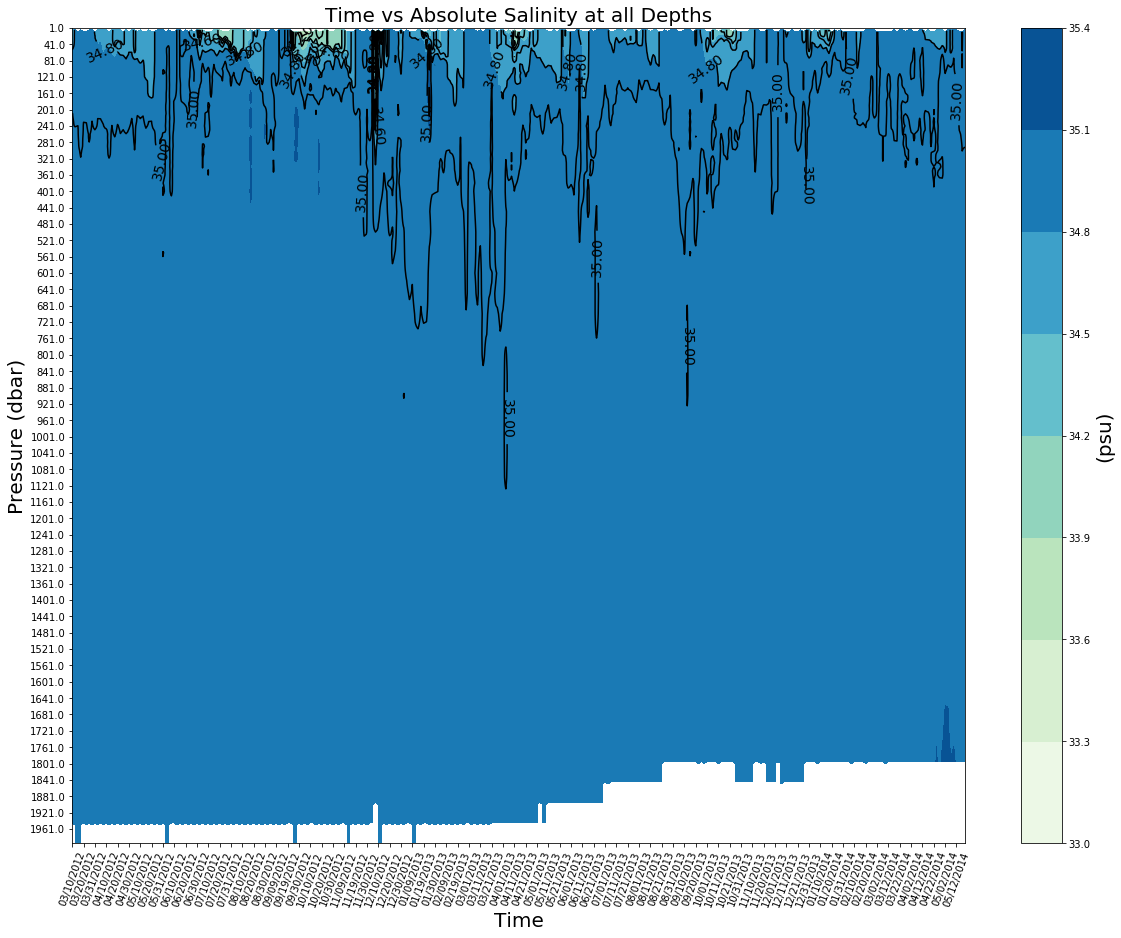

In [16]:
fig = plt.figure(figsize=(20,15))
ax = plt.axes()


im = plt.contourf((np.transpose(SA)),cmap='GnBu')
con = plt.contour((np.transpose(SA)),colors='k',levels=10) 

plt.clabel(con, fmt='%4.2f',fontsize=14)
# its plotting i-th profile on y-axis i want it to be pres

cbar = plt.colorbar(im)
cbar.set_label('(psu)',fontsize=20)

# x labels/ticks
# datestrs has 316 profiles, divisible by 4 = 79 ticks
positions1 = range(0,316,4);
plt.xticks(positions1,datestrs);
lab = pres_new
degrees=70
plt.xticks(rotation=degrees);

# x and y indices must match
positions2 = range(0,400,8)
plt.yticks(positions2,pres_new);
# y labels/ticks
# plt.yticks(pos, lab)
plt.gca().invert_yaxis()

plt.xlabel('Time',fontsize=20)
plt.ylabel('Pressure (dbar)',fontsize=20)
plt.title('Time vs Absolute Salinity at all Depths', fontsize=20)
plt.savefig('/Users/tyler/Desktop/SIO176/HW7/TimevsAbsSal', dpi=300, bbox_inches='tight')

# 5. Plot TS Diagram and identify some of the water masses present

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


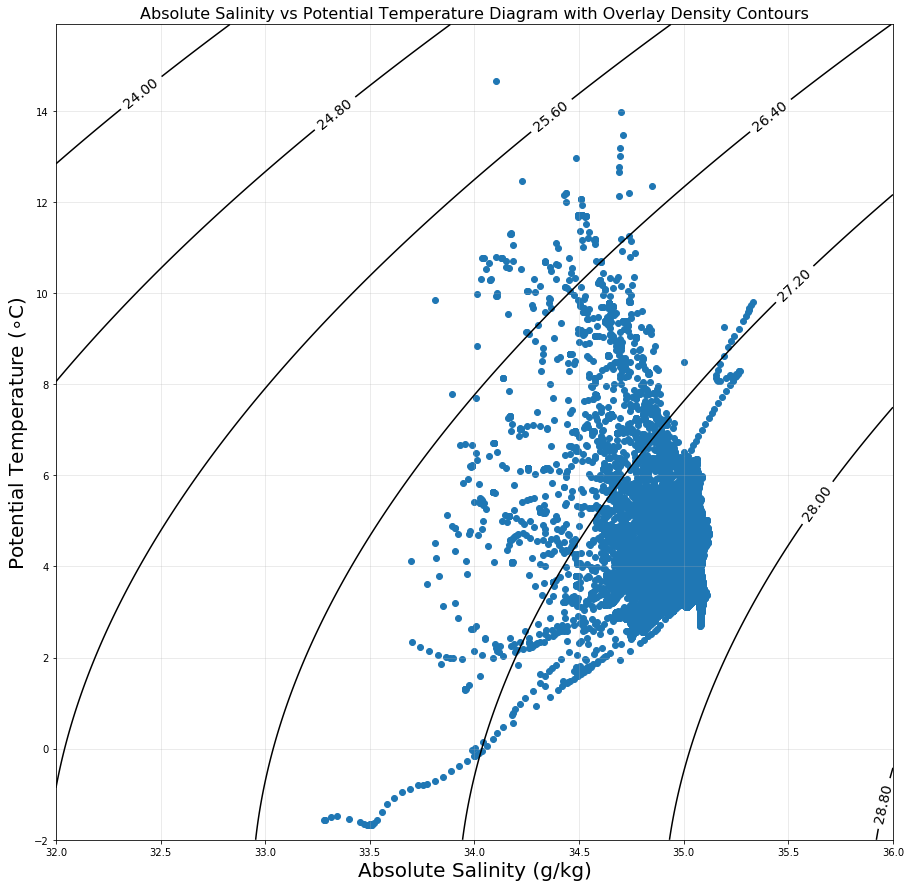

In [15]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()

# create density contours
meshx = np.linspace(32,36,10.1);
meshy = np.arange(-2,16,0.1)
S, T = np.meshgrid(meshx, meshy)
density = gsw.sigma0(S,T);
cont = plt.contour(S,T,density, colors='k') # k = black
plt.scatter(SA,pt);
plt.clabel(cont, fmt='%4.2f', fontsize=14) # label contours
plt.xlabel('Absolute Salinity (g/kg)',fontsize=20)
plt.ylabel('Potential Temperature ($\circ$C)',fontsize=20)
plt.title('Absolute Salinity vs Potential Temperature Diagram with Overlay Density Contours',fontsize=16);
plt.grid(alpha=0.3)
plt.savefig('/Users/tyler/Desktop/SIO176/HW7/TSDiagram', dpi=300, bbox_inches='tight')